In [1]:
import sys

import numpy  as np
import pandas as pd
import gc
import pprint
import hashlib

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn           as sns

from IPython.display import display

In [2]:
df = pd.read_csv('~/Documents/data/cartola-fc-brasil-scouts/jogadores.csv')

df['id']  = df['Nome'].apply( lambda x: hashlib.sha1(str.encode(x)).hexdigest() )
df['pos'] = df['Nome'].apply( lambda x: x.split('(')[-1].split(')')[0].strip() )

display( df.sort_values(by="Nome") )

scouts  = ['DS','G','A','SG','FS','FF','FD','FT','DD','DP','GC','CV','CA','PP','GS','FC','I','PI','RB','PE']
mercado = ['Preço', 'Média','Variação']
keys    = ["id", "ano"]

gscouts = df.groupby(keys)[scouts].agg(['sum'])
gscouts.columns = gscouts.columns.map('_'.join)
gscouts = gscouts.reset_index()

gmercado = df.groupby(keys)[mercado].agg(['sum'])
gmercado.columns = gmercado.columns.map('_'.join)
gmercado = gmercado.reset_index()

gpos = df.groupby(keys)[['pos']].agg(['first'])
gpos.columns = gpos.columns.map('_'.join)
gpos = gpos.reset_index()

display(gscouts.sample(5))
display(gmercado.sample(5))
display(gpos.sample(5))

display(gpos['pos_first'].value_counts())

,Nome,Clube,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,...,GS,FC,I,PI,rodada,ano,RB,PE,id,pos
7240,Abel Braga (TEC),Internacional,11.46,16.0,3.78,4.74,0.73,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,36,2020,NaN,NaN,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,TEC
6793,Abel Braga (TEC),Internacional,11.31,14.0,3.96,3.14,-0.18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,34,2020,NaN,NaN,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,TEC
6213,Abel Braga (TEC),Internacional,11.71,11.0,4.11,7.06,0.48,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,31,2020,NaN,NaN,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,TEC
8622,Abel Braga (TEC),Flamengo,10.28,4.0,3.58,4.30,0.43,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,2019,NaN,NaN,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,TEC
8840,Abel Braga (TEC),Flamengo,10.53,5.0,3.82,4.79,0.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5,2019,NaN,NaN,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,TEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14192,Éverson (GOL),Santos,9.79,23.0,4.25,8.00,-0.06,NaN,NaN,NaN,...,20.0,1.0,NaN,NaN,29,2019,NaN,34.0,6d99fcc3bc6b30aced0353e17beee4f211c2ee4a,GOL
10828,Éverson (GOL),Santos,8.62,8.0,4.36,6.20,1.45,NaN,NaN,NaN,...,6.0,NaN,NaN,NaN,14,2019,NaN,7.0,6d99fcc3bc6b30aced0353e17beee4f211c2ee4a,GOL
7848,Ênio (MEI),Botafogo,0.85,4.0,1.35,-0.20,-0.53,2.0,NaN,NaN,...,NaN,1.0,1.0,12.0,38,2020,NaN,NaN,98db7cfc8e99fe42e23ab3d1f8b9359815e9c023,MEI
7589,Ênio (MEI),Botafogo,1.38,3.0,1.87,3.10,0.32,2.0,NaN,NaN,...,NaN,NaN,1.0,3.0,37,2020,NaN,NaN,98db7cfc8e99fe42e23ab3d1f8b9359815e9c023,MEI


,id,ano,DS_sum,G_sum,A_sum,SG_sum,FS_sum,FF_sum,FD_sum,FT_sum,...,GC_sum,CV_sum,CA_sum,PP_sum,GS_sum,FC_sum,I_sum,PI_sum,RB_sum,PE_sum
519,64f14625c7399b7165a9926ecdd36d45bd0f9fc2,2020,161.0,14.0,0.0,44.0,108.0,42.0,72.0,0.0,...,0.0,0.0,37.0,0.0,0.0,183.0,0.0,504.0,0.0,0.0
1280,ff6ec5b9ef640eb6ff1992f03cdf6070e4eda50c,2020,11.0,2.0,0.0,0.0,8.0,5.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,27.0,2.0,21.0,0.0,0.0
1211,f22125baa9f9e05afc5b6c449a645ec4a86ae7be,2020,53.0,4.0,0.0,9.0,11.0,7.0,28.0,0.0,...,0.0,2.0,0.0,0.0,0.0,66.0,0.0,152.0,0.0,0.0
134,14f33434489bd23622b395e431e4661597182291,2019,0.0,0.0,0.0,0.0,12.0,1.0,2.0,0.0,...,0.0,0.0,5.0,0.0,0.0,23.0,0.0,0.0,6.0,20.0
834,a8859e843ec03a5840f47c4e06faa702e0c3129d,2020,82.0,0.0,6.0,12.0,34.0,18.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,33.0,0.0,430.0,0.0,0.0


,id,ano,Preço_sum,Média_sum,Variação_sum
267,312f143942d39bcf5193111f0a59382517f5dfcb,2020,41.32,7.60,-2.03
672,8503a68c00b8da9a7a8c757a25d5efb8e10e05e2,2020,4.72,2.80,1.63
1022,ce9d0ce7b42f2d22cdc307972357f47d589ce7e0,2020,31.82,20.24,0.91
917,b5961169af139ca35af0919e46ea9badb7fd7d56,2019,181.02,65.91,5.45
890,b130e9231a4a4e274dec4229a2c1227d8e45aa3e,2019,88.62,36.99,2.65


,id,ano,pos_first
603,778443828e80518d92f2d224173f0557a9f5c2d0,2019,ZAG
1173,eb7991be83da9aa01100c21cf7418af4ee8170c3,2020,ATA
542,696f38ebb73a5231dc1438437b08e90eabea32ed,2019,MEI
1039,d17983b5bb799fb559af6db4cb9cb01bd452dfaa,2020,GOL
31,053e723f1806c16b8fdeb85c61348224ef0bfeb2,2020,MEI


MEI    408
ATA    285
ZAG    203
LAT    200
GOL     96
TEC     91
Name: pos_first, dtype: int64

# naive

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

## agglomerative hierarchical 

In [4]:
%matplotlib inline

import scipy.cluster.hierarchy as hierarchical
from sklearn.cluster       import AgglomerativeClustering

In [5]:
scaler = StandardScaler()

X = pd.concat([gscouts.drop(columns=keys), gmercado.drop(columns=keys)], axis=1).copy()
X = X.astype(np.float64).fillna(0.0).values
X = scaler.fit_transform( X )
X.shape

(1283, 23)

CPU times: user 168 ms, sys: 4.17 ms, total: 172 ms
Wall time: 169 ms


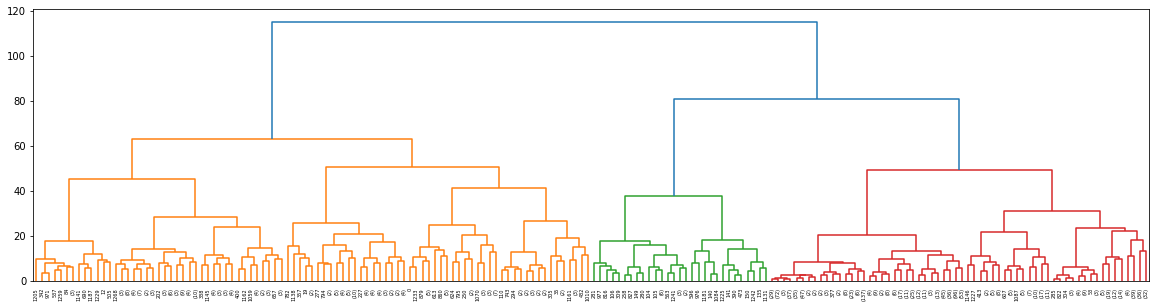

In [6]:
%%time
plt.figure(figsize=(20,5))
dend = hierarchical.dendrogram( hierarchical.linkage(X, method='ward'), truncate_mode='level', p=7 )

- - -

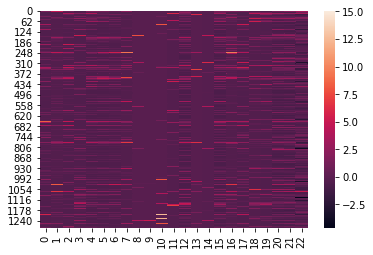

In [7]:
sns.heatmap(X);

/home/dusodeth/.local/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


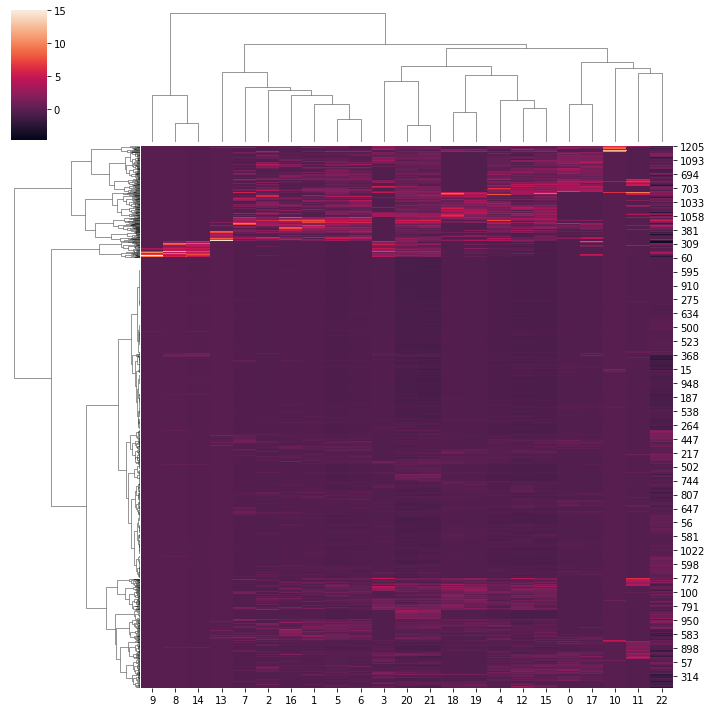

In [8]:
sns.clustermap(X, method='ward');

- - -

In [9]:
analise = pd.concat([gscouts.drop(columns=keys), gmercado.drop(columns=keys), gpos['pos_first']], axis=1).copy()

In [10]:
%%time
aggclu = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
aggclu.fit_predict(X)

analise['classe'] = aggclu.labels_
analise['cell']   = 1

CPU times: user 29.4 ms, sys: 648 µs, total: 30 ms
Wall time: 29.8 ms


In [11]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [12]:
ptab = pd.pivot_table(analise, 
                        values  = 'cell', 
                        index   = 'pos_first', 
                        columns = 'classe', 
                        aggfunc = 'count',
                        fill_value = 0.0)
# ptab_perc = ptab.copy()
# ptab_perc.div( ptab.sum(axis=1), axis=0 ).style.apply(highlight_max, axis=1)
ptab.style.apply(highlight_max, axis=0)

classe,0,1,2,3,4,5
pos_first,,,,,,
ATA,16,42,0,42,8,177
GOL,0,0,37,2,0,57
LAT,33,1,0,52,12,102
MEI,38,15,0,81,34,240
TEC,0,0,0,22,0,69
ZAG,24,0,0,60,4,115


CPU times: user 231 ms, sys: 631 ms, total: 861 ms
Wall time: 60.2 ms


Text(0.5, 0, 'z')

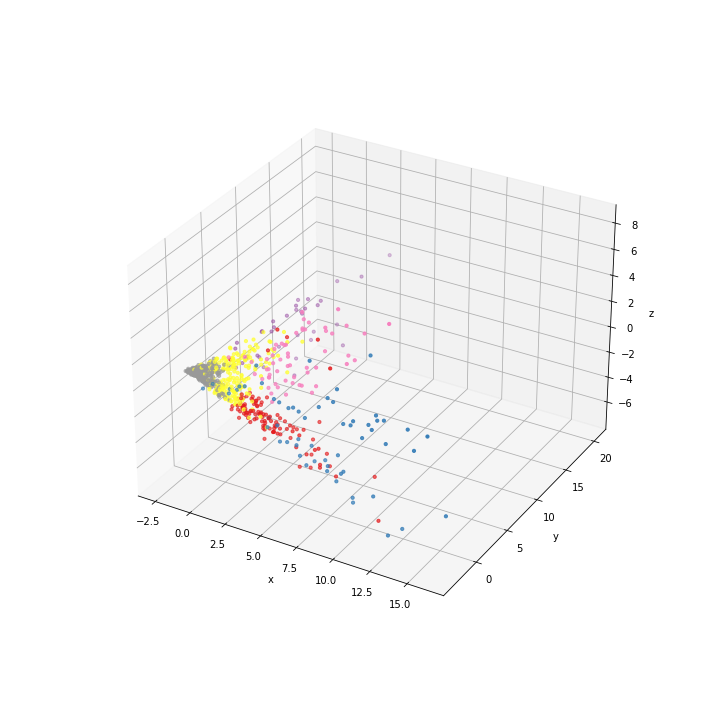

In [13]:
%%time

%matplotlib widget

pca = PCA(n_components=3)
pca.fit(X)

vis = pd.DataFrame(pca.transform(X))
vis['classe'] = aggclu.labels_

ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

ax.scatter(vis[0], vis[1], vis[2], c=vis['classe'], cmap="Set1", s=10)
# ax.scatter(vis[0], vis[1], zs=0, zdir='z', s=10)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

## spectral

In [14]:
%matplotlib inline

from sklearn.cluster import SpectralClustering

In [15]:
%%time
spectral = SpectralClustering(n_clusters=6, 
                              random_state=22, 
                              n_neighbors=10, 
                              affinity='nearest_neighbors')
spectral.fit_predict(X)

analise['classe'] = spectral.labels_
analise['cell']   = 1

CPU times: user 1.36 s, sys: 2.48 s, total: 3.83 s
Wall time: 277 ms


In [16]:
ptab = pd.pivot_table(analise, 
                        values  = 'cell', 
                        index   = 'pos_first', 
                        columns = 'classe', 
                        aggfunc = 'count',
                        fill_value = 0.0)
# ptab_perc = ptab.copy()
# ptab_perc.div( ptab.sum(axis=1), axis=0 ).style.apply(highlight_max, axis=1)
ptab.style.apply(highlight_max, axis=0)

classe,0,1,2,3,4,5
pos_first,,,,,,
ATA,121,105,34,25,0,0
GOL,25,0,14,18,0,39
LAT,67,85,24,24,0,0
MEI,156,157,50,45,0,0
TEC,34,0,9,7,41,0
ZAG,77,76,23,27,0,0


- - -

+ [Getting Started with Spectral Clustering by Dr. Juan Camilo Orduz](https://juanitorduz.github.io/spectral_clustering/)
+ [The Spectral Theorem for Matrices by Dr. Juan Camilo Orduz](https://juanitorduz.github.io/the-spectral-theorem-for-matrices/)
+ [Laplacian matrix @ Wikipedia](https://en.wikipedia.org/wiki/Laplacian_matrix)

CPU times: user 255 ms, sys: 725 ms, total: 980 ms
Wall time: 69.7 ms


Text(0.5, 0, 'z')

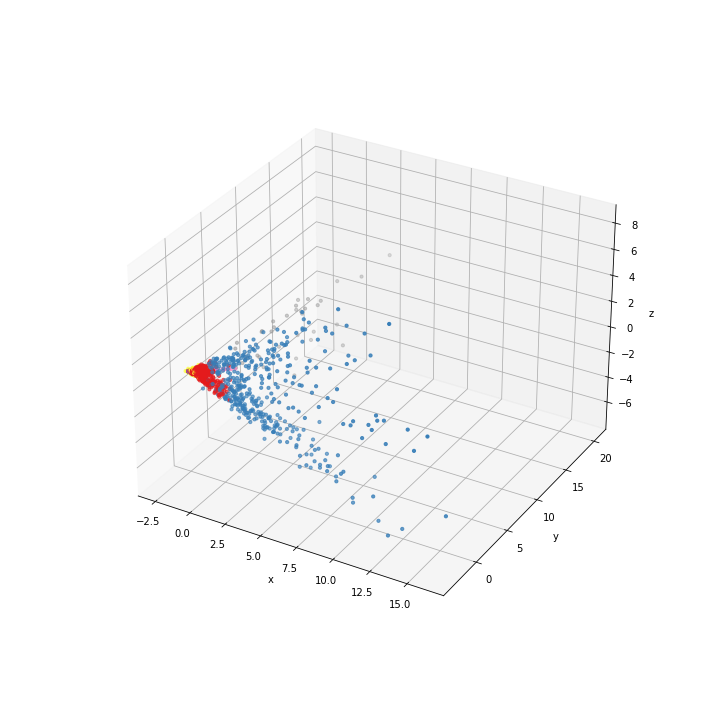

In [17]:
%%time

%matplotlib widget

pca = PCA(n_components=3)
pca.fit(X)

vis = pd.DataFrame(pca.transform(X))
vis['classe'] = spectral.labels_

ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

ax.scatter(vis[0], vis[1], vis[2], c=vis['classe'], cmap="Set1", s=10)
# ax.scatter(vis[0], vis[1], zs=0, zdir='z', s=10)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

## dbscan

In [18]:
%matplotlib inline

import hdbscan

In [19]:
%%time
dbscan = hdbscan.HDBSCAN(min_cluster_size=3, 
                         min_samples=1,
                        cluster_selection_epsilon=3.0)
dbscan.fit_predict(X)

analise['classe'] = dbscan.labels_
analise['cell']   = 1

ptab = pd.pivot_table(analise, 
                        values  = 'cell', 
                        index   = 'pos_first', 
                        columns = 'classe', 
                        aggfunc = 'count',
                        fill_value = 0.0)
# ptab_perc = ptab.copy()
# ptab_perc.div( ptab.sum(axis=1), axis=0 ).style.apply(highlight_max, axis=1)
ptab.style.apply(highlight_max, axis=0)

CPU times: user 69.4 ms, sys: 853 µs, total: 70.3 ms
Wall time: 69.7 ms


classe,-1,0,1,2,3,4,5,6,7,8
pos_first,,,,,,,,,,
ATA,45,5,0,0,0,0,0,0,0,235
GOL,21,0,6,0,0,0,0,0,3,66
LAT,28,0,0,1,0,0,3,0,0,168
MEI,54,0,0,0,3,3,0,3,0,345
TEC,0,0,0,0,0,0,0,0,0,91
ZAG,18,0,0,4,0,0,0,0,0,181


CPU times: user 128 ms, sys: 278 ms, total: 406 ms
Wall time: 29.6 ms


Text(0.5, 0, 'z')

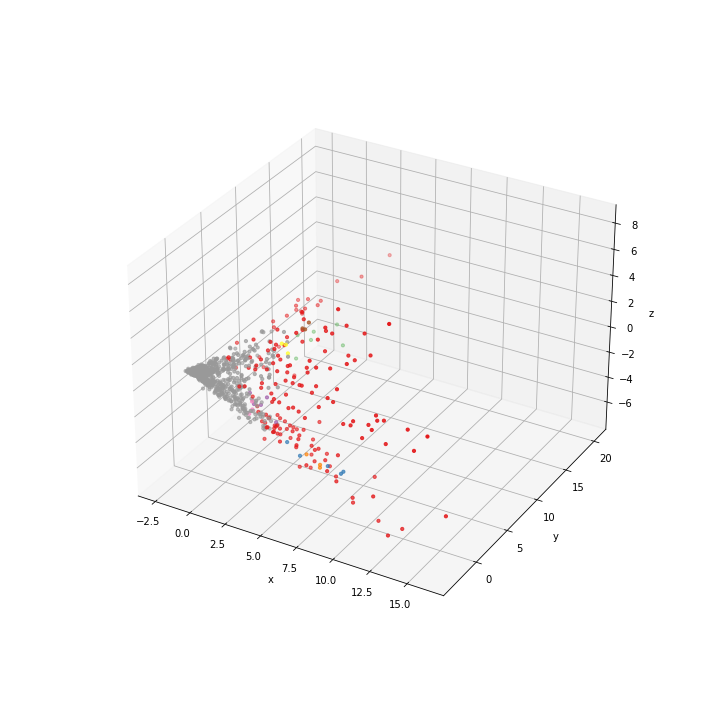

In [20]:
%%time

%matplotlib widget

pca = PCA(n_components=3)
pca.fit(X)

vis = pd.DataFrame(pca.transform(X))
vis['classe'] = dbscan.labels_

ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

ax.scatter(vis[0], vis[1], vis[2], c=vis['classe'], cmap="Set1", s=10)
# ax.scatter(vis[0], vis[1], zs=0, zdir='z', s=10)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

## som

In [49]:
%matplotlib inline

import somoclu

CPU times: user 4.27 s, sys: 126 ms, total: 4.39 s
Wall time: 311 ms


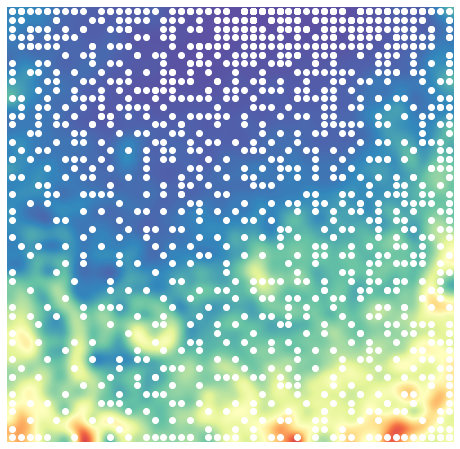

<module 'matplotlib.pyplot' from '/home/dusodeth/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [57]:
n_rows, n_columns = 50, 50
som = somoclu.Somoclu(n_columns, n_rows, 
                      compactsupport=False)
%time som.train(X)

som.view_umatrix(bestmatches=True)

- - -

In [58]:
%matplotlib inline

from minisom import MiniSom

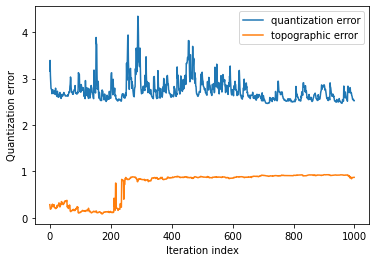

CPU times: user 1.49 s, sys: 0 ns, total: 1.49 s
Wall time: 1.49 s


In [63]:
%%time

som_shape = (1, 6)

som = MiniSom(som_shape[0], som_shape[1], X.shape[1], sigma=0.5, learning_rate=0.5)

max_iter = 1000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(X))
    som.update(X[rand_i], som.winner(X[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(X))
    t_error.append(som.topographic_error(X))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('Quantization error')
plt.xlabel('Iteration index')
plt.legend()
plt.show()

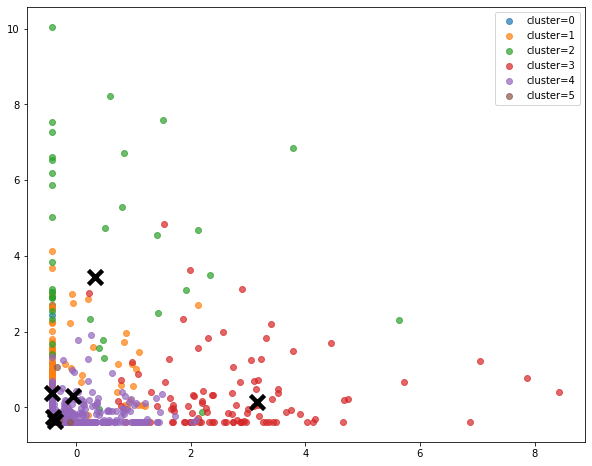

In [64]:
winner_coordinates = np.array([som.winner(x) for x in X]).T

cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

plt.figure(figsize=(10,8))

for c in np.unique(cluster_index):
    plt.scatter(X[cluster_index == c, 0],
                X[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=10, linewidths=20, color='k') # label='centroid'
    
plt.legend()

In [65]:
%%time

analise['classe'] = cluster_index
analise['cell']   = 1

ptab = pd.pivot_table(analise, 
                        values  = 'cell', 
                        index   = 'pos_first', 
                        columns = 'classe', 
                        aggfunc = 'count',
                        fill_value = 0.0)
# ptab_perc = ptab.copy()
# ptab_perc.div( ptab.sum(axis=1), axis=0 ).style.apply(highlight_max, axis=1)
ptab.style.apply(highlight_max, axis=0)

CPU times: user 9.1 ms, sys: 1.27 ms, total: 10.4 ms
Wall time: 9.85 ms


classe,0,1,2,3,4,5
pos_first,,,,,,
ATA,0,52,27,8,198,0
GOL,0,0,0,0,71,25
LAT,11,21,0,31,137,0
MEI,11,62,10,38,287,0
TEC,0,0,0,0,91,0
ZAG,11,19,0,24,149,0


CPU times: user 132 ms, sys: 298 ms, total: 430 ms
Wall time: 29.4 ms


Text(0.5, 0, 'z')

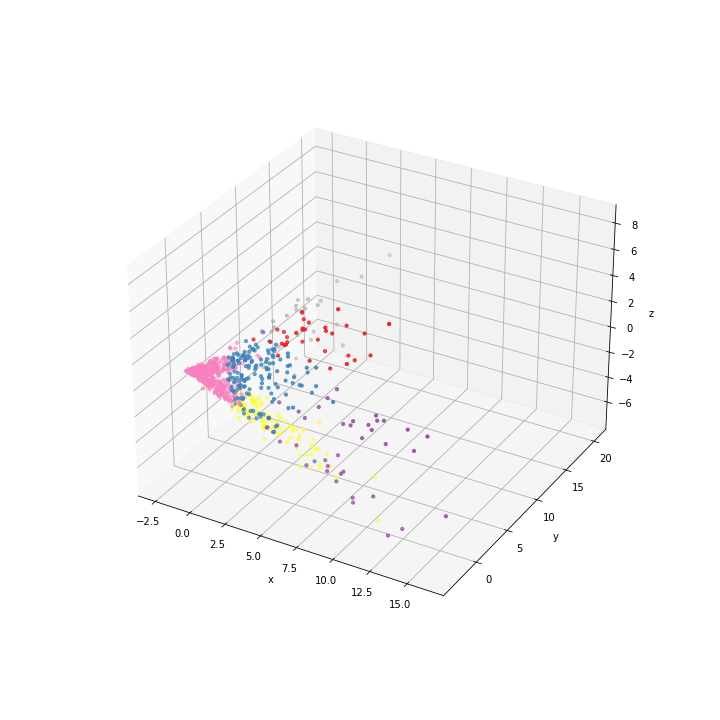

In [66]:
%%time

%matplotlib widget

pca = PCA(n_components=3)
pca.fit(X)

vis = pd.DataFrame(pca.transform(X))
vis['classe'] = cluster_index

ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

ax.scatter(vis[0], vis[1], vis[2], c=vis['classe'], cmap="Set1", s=10)
# ax.scatter(vis[0], vis[1], zs=0, zdir='z', s=10)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# seleção

In [67]:
sys.path.insert(1, '/home/dusodeth/Documents/data/feature-selector/feature_selector/')

from feature_selector import FeatureSelector

In [68]:
X = pd.concat([gscouts.drop(columns=keys), gmercado.drop(columns=keys)], axis=1).copy()
X['TARGET'] = 1

fs = FeatureSelector(data   = X.drop(columns="TARGET"), 
                     labels = X["TARGET"])

0 features with greater than 0.50 missing values.

[]


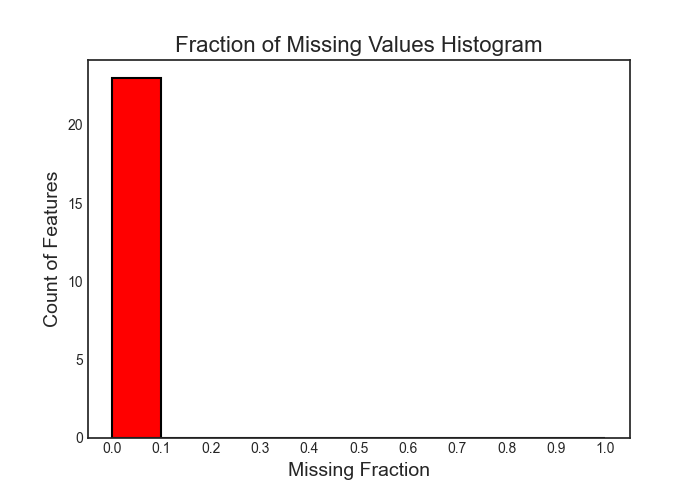

In [69]:
fs.identify_missing(missing_threshold = 0.5)
missing_features = fs.ops['missing']
print(missing_features)

fs.plot_missing()

0 features with a single unique value.

[]


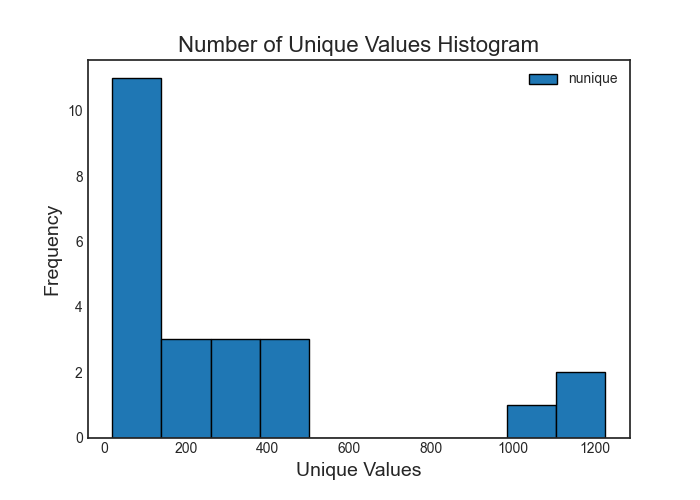

In [70]:
fs.identify_single_unique()
single_unique = fs.ops['single_unique']
print(single_unique)

fs.plot_unique()

15 features with a correlation magnitude greater than 0.50.

['A_sum', 'FS_sum', 'FF_sum', 'FD_sum', 'FT_sum', 'DP_sum', 'CA_sum', 'GS_sum', 'FC_sum', 'I_sum', 'PI_sum', 'RB_sum', 'PE_sum', 'Preço_sum', 'Média_sum']


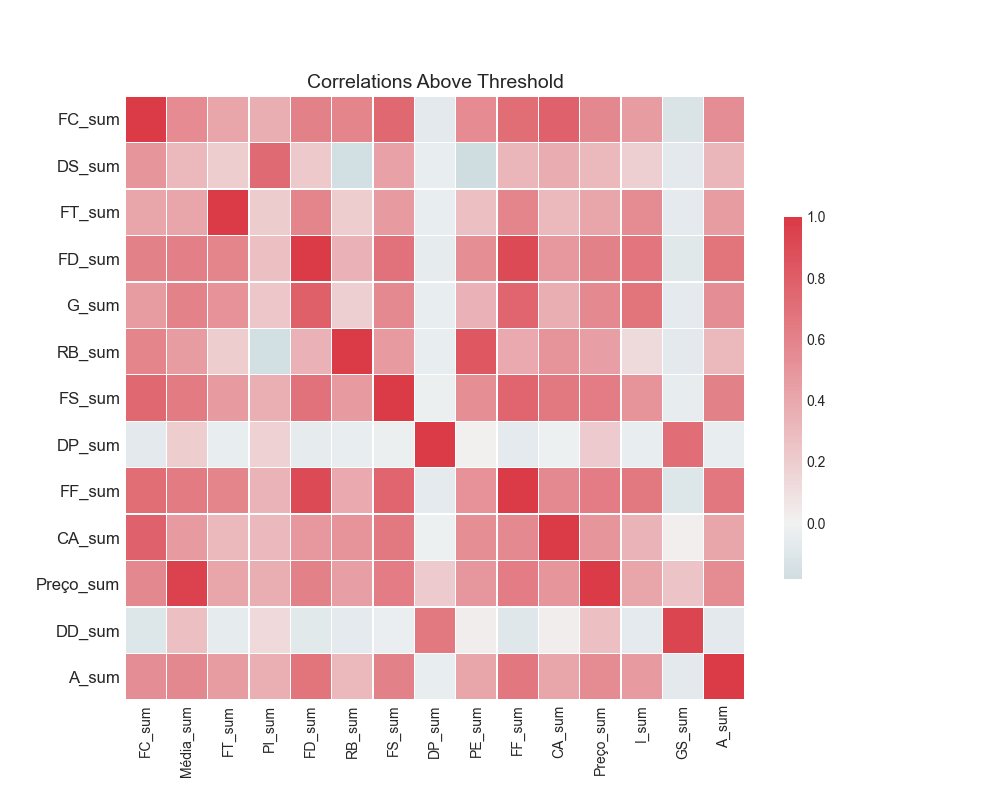

In [71]:
fs.identify_collinear(correlation_threshold=0.5)
correlated_features = fs.ops['collinear']
print(correlated_features)

fs.plot_collinear()

In [72]:
drop_ = missing_features + single_unique + correlated_features
drop_

['A_sum',
 'FS_sum',
 'FF_sum',
 'FD_sum',
 'FT_sum',
 'DP_sum',
 'CA_sum',
 'GS_sum',
 'FC_sum',
 'I_sum',
 'PI_sum',
 'RB_sum',
 'PE_sum',
 'Preço_sum',
 'Média_sum']

- - -

In [73]:
scaler = StandardScaler()

X = pd.concat([gscouts.drop(columns=keys), gmercado.drop(columns=keys)], axis=1).copy().drop(columns=drop_)
X = X.astype(np.float64).fillna(0.0).values
X = scaler.fit_transform( X )
X.shape

(1283, 8)

## agglomerative hierarchical 

In [74]:
%matplotlib inline

import scipy.cluster.hierarchy as hierarchical
from sklearn.cluster       import AgglomerativeClustering

CPU times: user 114 ms, sys: 2.37 ms, total: 117 ms
Wall time: 113 ms


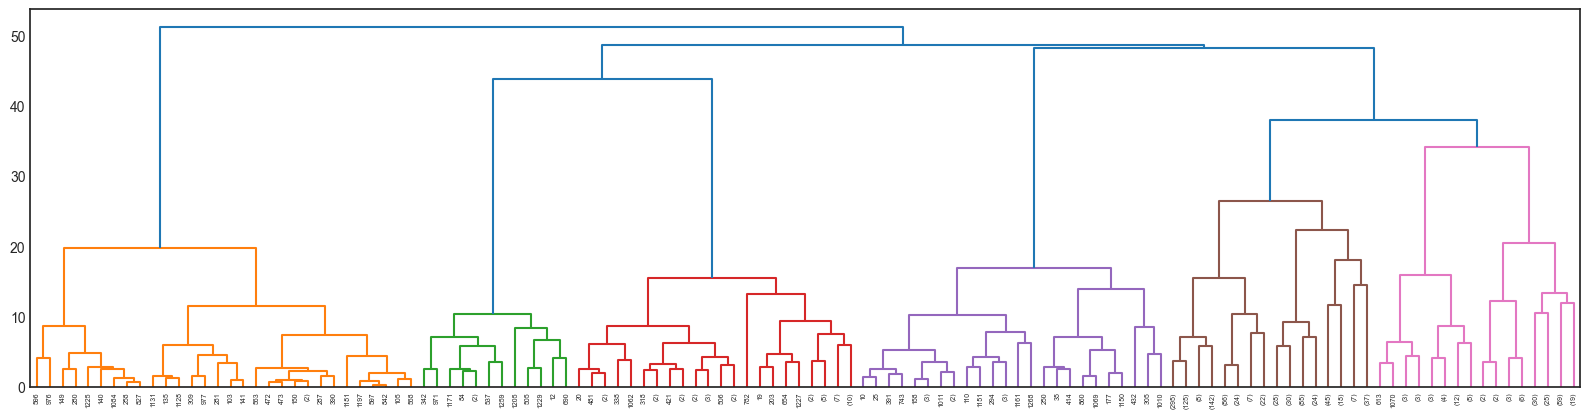

In [75]:
%%time
plt.figure(figsize=(20,5))
dend = hierarchical.dendrogram( hierarchical.linkage(X, method='ward'), truncate_mode='level', p=7 )

- - -

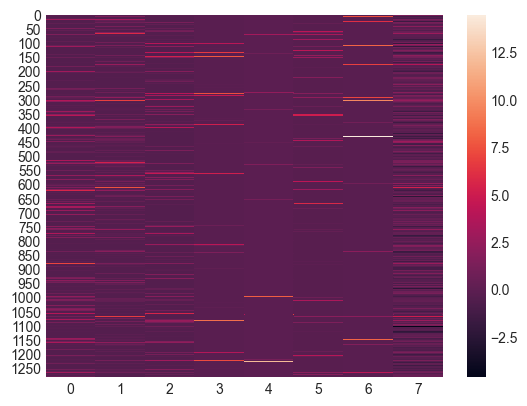

In [76]:
sns.heatmap(X);

/home/dusodeth/.local/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


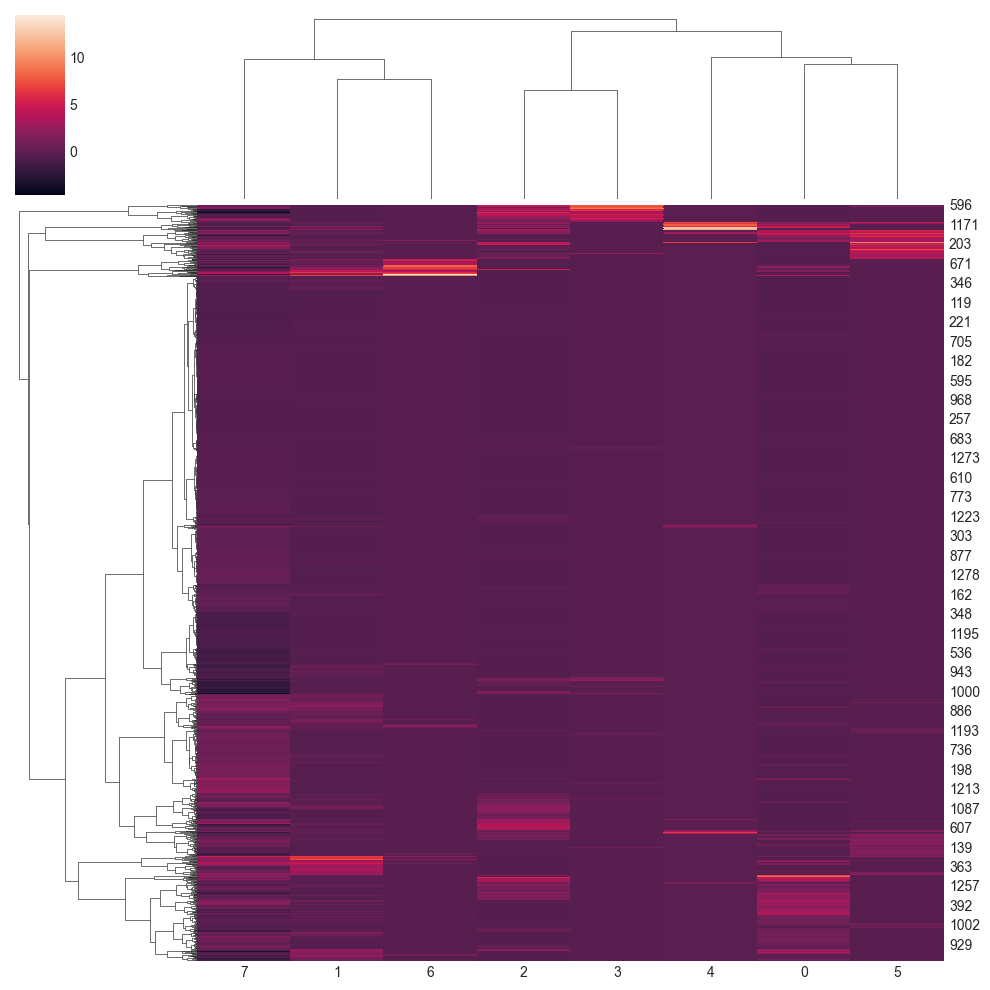

In [77]:
sns.clustermap(X, method='ward');

- - -

In [78]:
analise = pd.concat([gscouts.drop(columns=keys), gmercado.drop(columns=keys), gpos['pos_first']], axis=1).copy()

In [79]:
for i in range(X.shape[1]):
    print(i, analise.columns[i])

0 DS_sum
1 G_sum
2 A_sum
3 SG_sum
4 FS_sum
5 FF_sum
6 FD_sum
7 FT_sum


In [80]:
%%time
aggclu = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')
aggclu.fit_predict(X)

analise['classe'] = aggclu.labels_
analise['cell']   = 1

CPU times: user 23.9 ms, sys: 0 ns, total: 23.9 ms
Wall time: 23.8 ms


In [81]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [82]:
ptab = pd.pivot_table(analise, 
                        values  = 'cell', 
                        index   = 'pos_first', 
                        columns = 'classe', 
                        aggfunc = 'count',
                        fill_value = 0.0)
# ptab_perc = ptab.copy()
# ptab_perc.div( ptab.sum(axis=1), axis=0 ).style.apply(highlight_max, axis=1)
ptab.style.apply(highlight_max, axis=0)

classe,0,1,2,3,4,5
pos_first,,,,,,
ATA,285,0,0,0,0,0
GOL,94,0,2,0,0,0
LAT,193,4,0,0,1,2
MEI,403,2,0,1,0,2
TEC,91,0,0,0,0,0
ZAG,194,8,0,0,1,0


CPU times: user 96.9 ms, sys: 234 ms, total: 331 ms
Wall time: 26.3 ms


Text(0.5, 0, 'z')

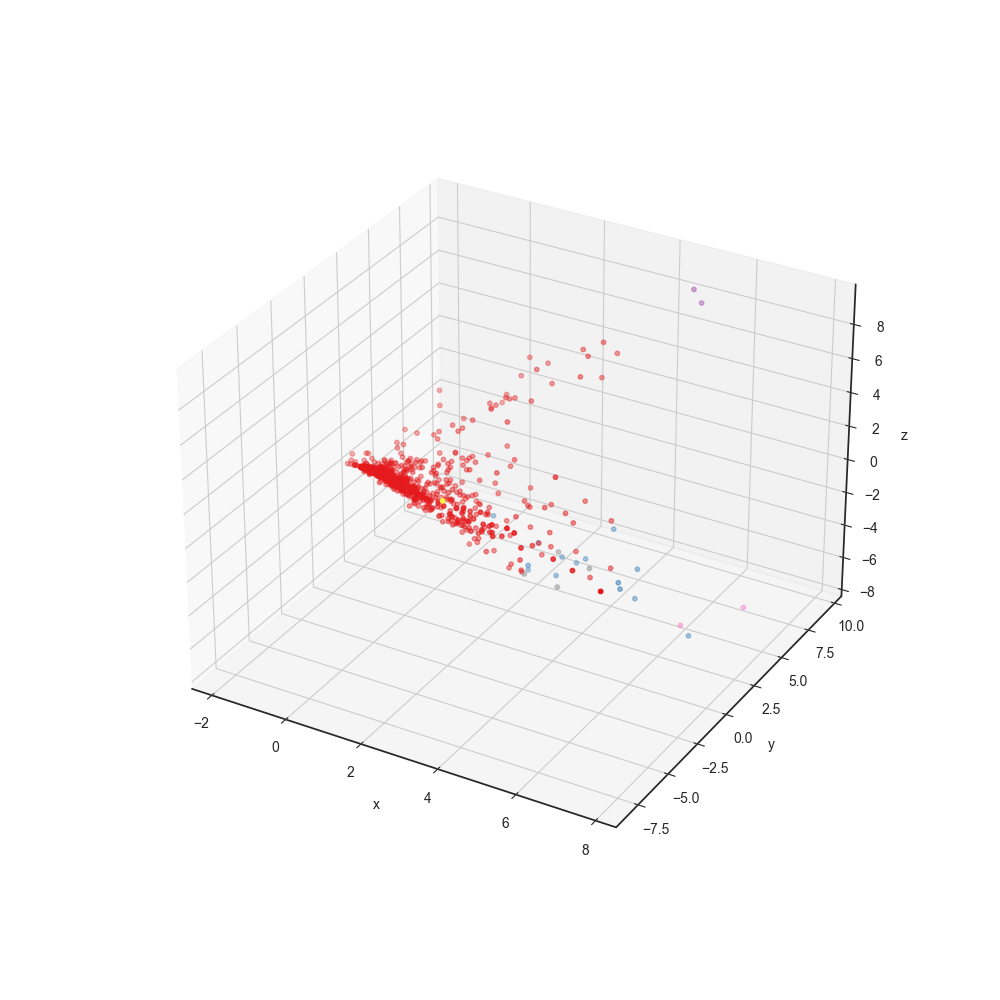

In [83]:
%%time

%matplotlib widget

pca = PCA(n_components=3)
pca.fit(X)

vis = pd.DataFrame(pca.transform(X))
vis['classe'] = aggclu.labels_

ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

ax.scatter(vis[0], vis[1], vis[2], c=vis['classe'], cmap="Set1", s=10)
# ax.scatter(vis[0], vis[1], zs=0, zdir='z', s=10)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

## spectral

In [84]:
%matplotlib inline

from sklearn.cluster import SpectralClustering

In [85]:
%%time
spectral = SpectralClustering(n_clusters=6, 
                              random_state=22, 
                              n_neighbors=50, 
                              affinity='nearest_neighbors')
spectral.fit_predict(X)

analise['classe'] = spectral.labels_
analise['cell']   = 1

CPU times: user 1.19 s, sys: 1.54 s, total: 2.73 s
Wall time: 309 ms


In [86]:
ptab = pd.pivot_table(analise, 
                        values  = 'cell', 
                        index   = 'pos_first', 
                        columns = 'classe', 
                        aggfunc = 'count',
                        fill_value = 0.0)
# ptab_perc = ptab.copy()
# ptab_perc.div( ptab.sum(axis=1), axis=0 ).style.apply(highlight_max, axis=1)
ptab.style.apply(highlight_max, axis=0)

classe,0,1,2,3,4,5
pos_first,,,,,,
ATA,120,46,30,20,27,42
GOL,10,5,18,12,42,9
LAT,15,27,20,17,101,20
MEI,98,68,50,33,99,60
TEC,27,23,9,16,0,16
ZAG,14,25,28,19,99,18


- - -

+ [Getting Started with Spectral Clustering by Dr. Juan Camilo Orduz](https://juanitorduz.github.io/spectral_clustering/)
+ [The Spectral Theorem for Matrices by Dr. Juan Camilo Orduz](https://juanitorduz.github.io/the-spectral-theorem-for-matrices/)
+ [Laplacian matrix @ Wikipedia](https://en.wikipedia.org/wiki/Laplacian_matrix)

CPU times: user 97.2 ms, sys: 172 ms, total: 269 ms
Wall time: 24.6 ms


Text(0.5, 0, 'z')

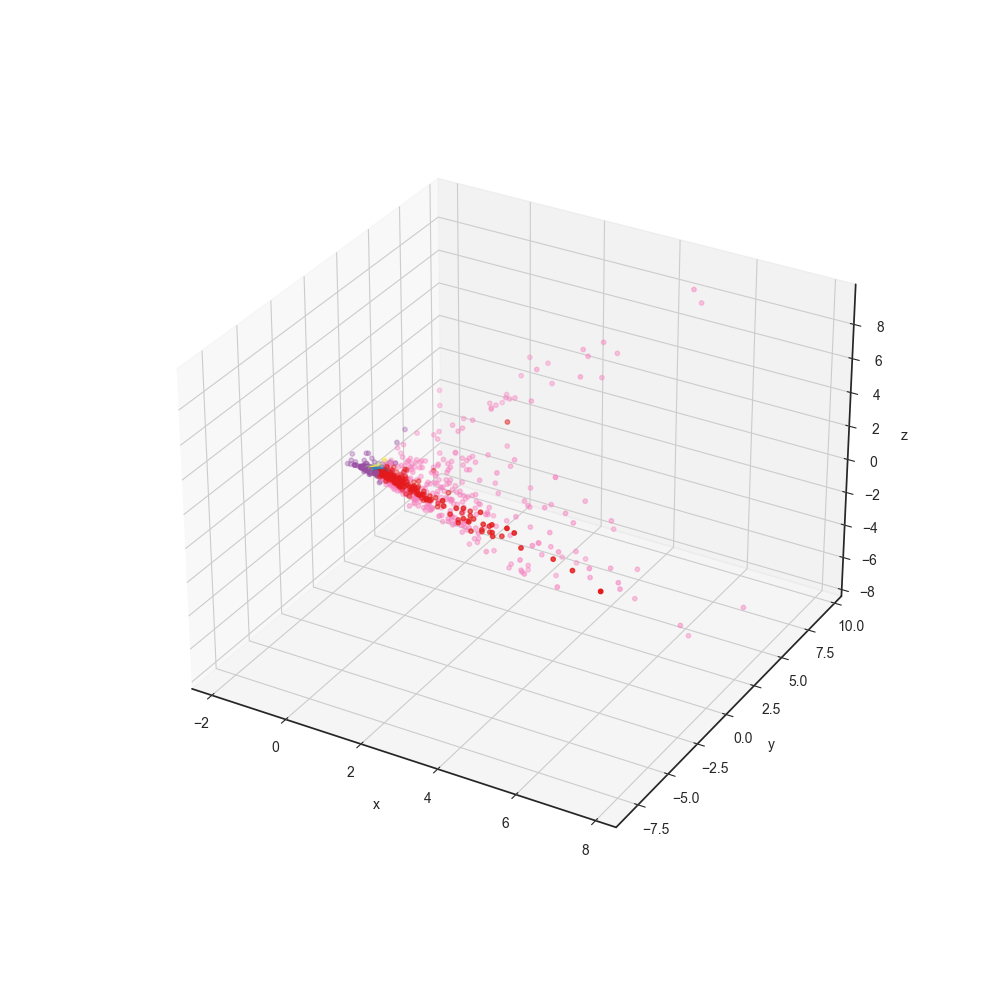

In [87]:
%%time

%matplotlib widget

pca = PCA(n_components=3)
pca.fit(X)

vis = pd.DataFrame(pca.transform(X))
vis['classe'] = spectral.labels_

ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

ax.scatter(vis[0], vis[1], vis[2], c=vis['classe'], cmap="Set1", s=10)
# ax.scatter(vis[0], vis[1], zs=0, zdir='z', s=10)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

## dbscan

In [88]:
%matplotlib inline

import hdbscan

In [89]:
%%time
dbscan = hdbscan.HDBSCAN(min_cluster_size=2, 
                         min_samples=1,
                        cluster_selection_epsilon=2.9)
dbscan.fit_predict(X)

analise['classe'] = dbscan.labels_
analise['cell']   = 1

ptab = pd.pivot_table(analise, 
                        values  = 'cell', 
                        index   = 'pos_first', 
                        columns = 'classe', 
                        aggfunc = 'count',
                        fill_value = 0.0)
# ptab_perc = ptab.copy()
# ptab_perc.div( ptab.sum(axis=1), axis=0 ).style.apply(highlight_max, axis=1)
ptab.style.apply(highlight_max, axis=0)

CPU times: user 69.1 ms, sys: 1.1 ms, total: 70.2 ms
Wall time: 69.4 ms


classe,-1,0,1,2,3,4,5,6,7,8
pos_first,,,,,,,,,,
ATA,3,1,0,0,0,0,0,0,2,279
GOL,2,0,0,0,0,0,0,0,0,94
LAT,5,0,0,0,0,2,1,2,0,190
MEI,2,1,2,0,0,0,0,2,0,401
TEC,0,0,0,0,0,0,0,0,0,91
ZAG,3,0,0,2,2,3,1,0,0,192


CPU times: user 130 ms, sys: 179 ms, total: 309 ms
Wall time: 26.7 ms


Text(0.5, 0, 'z')

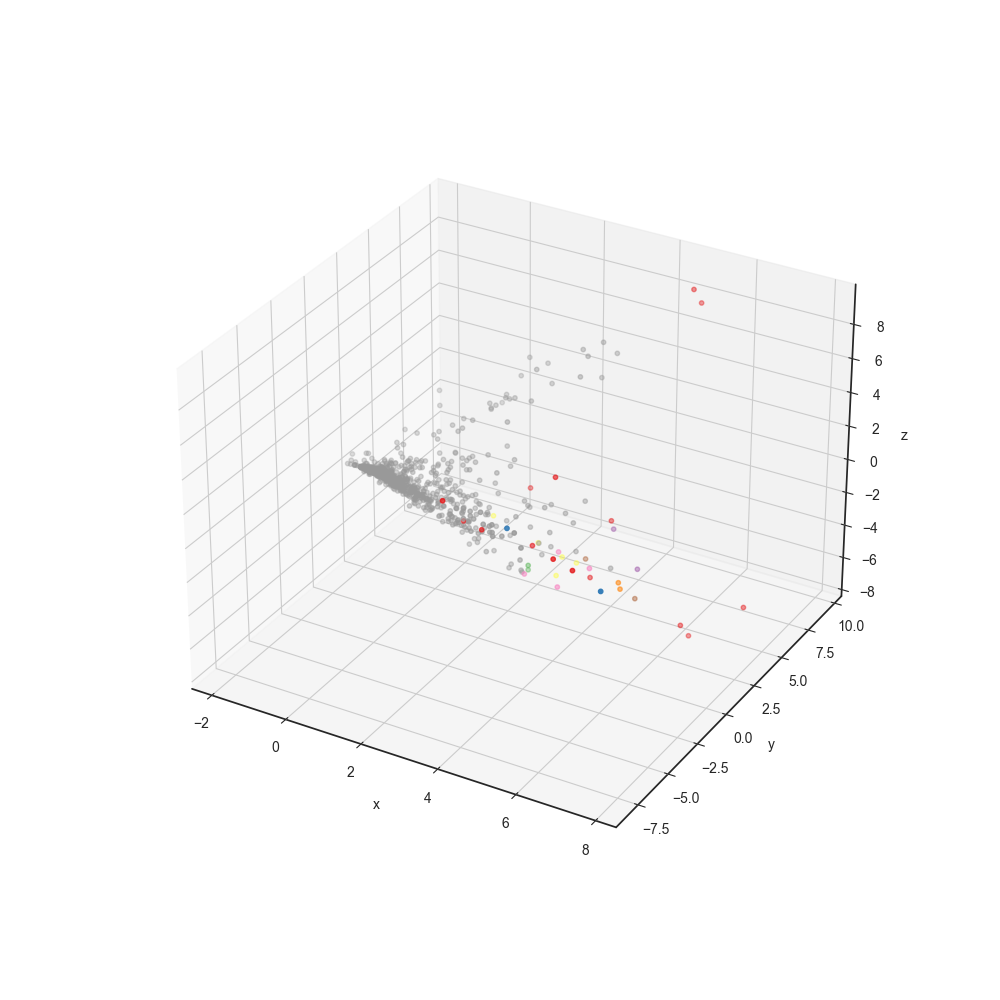

In [90]:
%%time

%matplotlib widget

pca = PCA(n_components=3)
pca.fit(X)

vis = pd.DataFrame(pca.transform(X))
vis['classe'] = dbscan.labels_

ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

ax.scatter(vis[0], vis[1], vis[2], c=vis['classe'], cmap="Set1", s=10)
# ax.scatter(vis[0], vis[1], zs=0, zdir='z', s=10)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

## som

In [191]:
%matplotlib inline

import somoclu

CPU times: user 3.59 s, sys: 0 ns, total: 3.59 s
Wall time: 238 ms


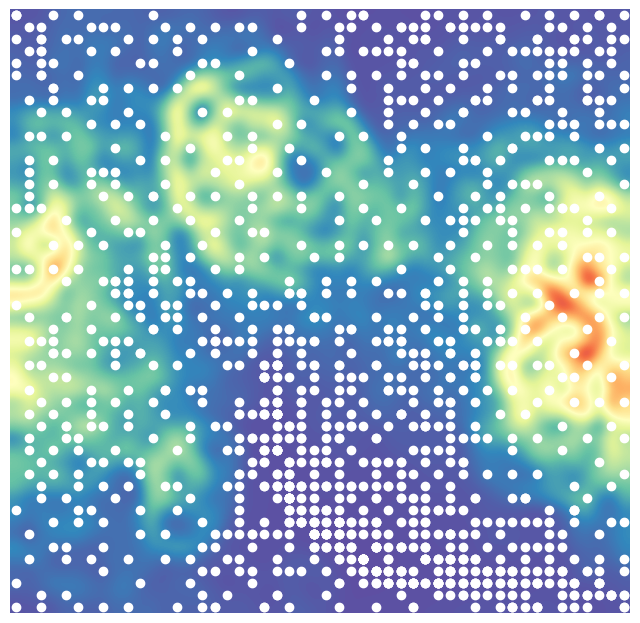

<module 'matplotlib.pyplot' from '/home/dusodeth/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [192]:
n_rows, n_columns = 50, 50

som = somoclu.Somoclu(n_columns, n_rows, 
                      compactsupport=False,
                      maptype="toroid")
%time som.train(X)

som.view_umatrix(bestmatches=True)

In [193]:
aggclu = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')

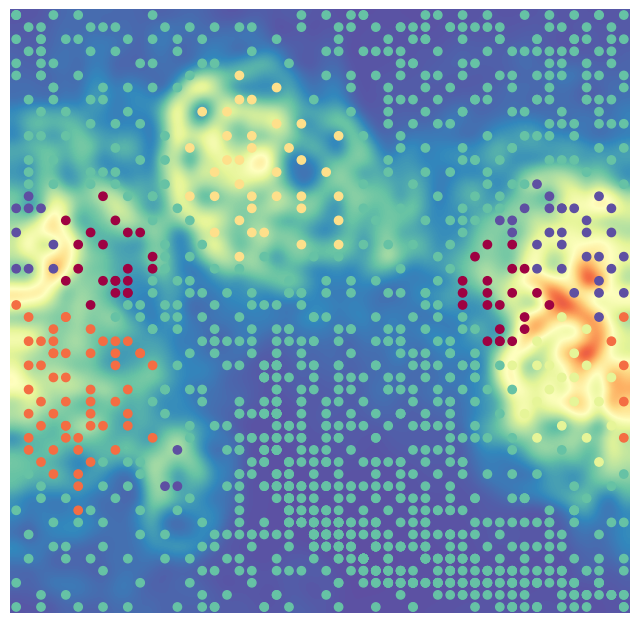

<module 'matplotlib.pyplot' from '/home/dusodeth/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [194]:
som.cluster(algorithm=aggclu)
som.view_umatrix(bestmatches=True)

In [195]:
# som.get_surface_state().shape
# som.get_surface_state()[0]

CPU times: user 684 ms, sys: 680 ms, total: 1.36 s
Wall time: 461 ms


Text(0.5, 0, 'z')

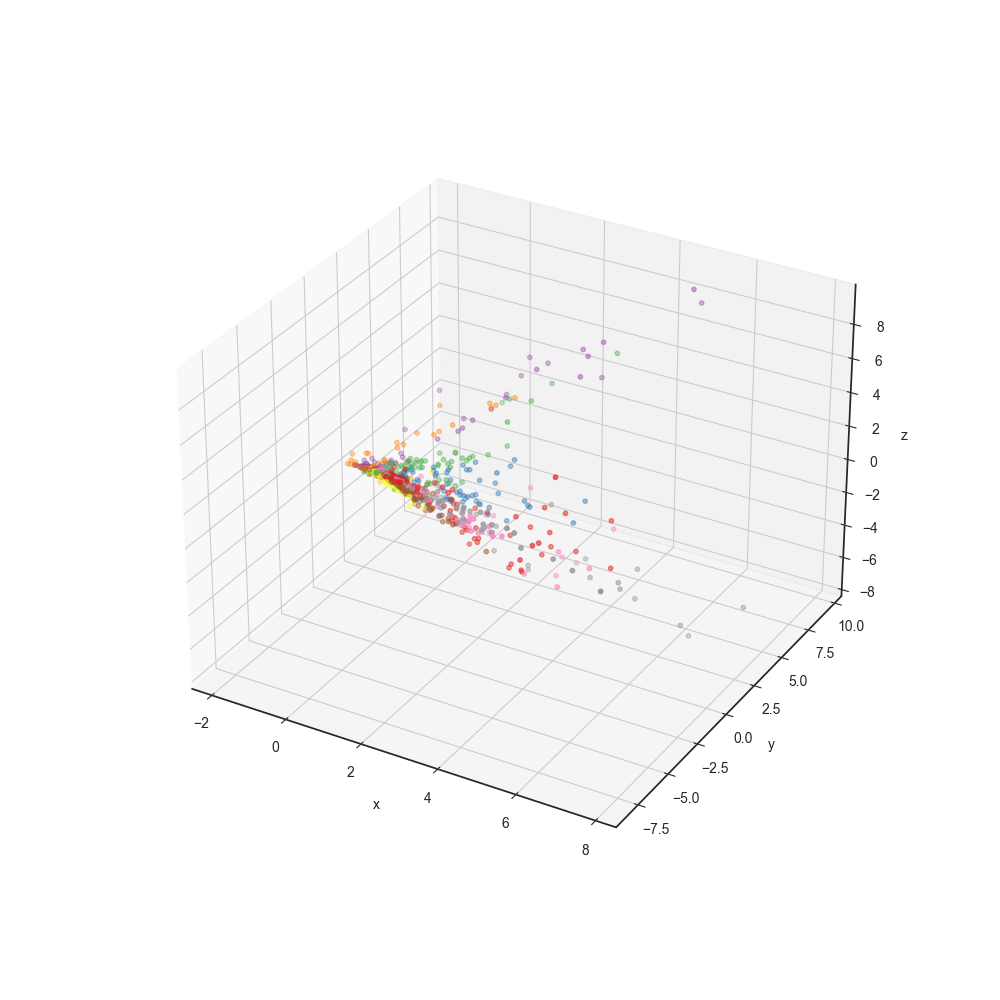

In [196]:
%%time

%matplotlib widget

pca = PCA(n_components=3)
pca.fit(X)

vis = pd.DataFrame(pca.transform(X))
vis['classe'] = som.get_bmus(som.get_surface_state())[:,0]

ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

ax.scatter(vis[0], vis[1], vis[2], c=vis['classe'], cmap="Set1", s=10)
# ax.scatter(vis[0], vis[1], zs=0, zdir='z', s=10)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

CPU times: user 714 ms, sys: 682 ms, total: 1.4 s
Wall time: 516 ms


Text(0.5, 0, 'z')

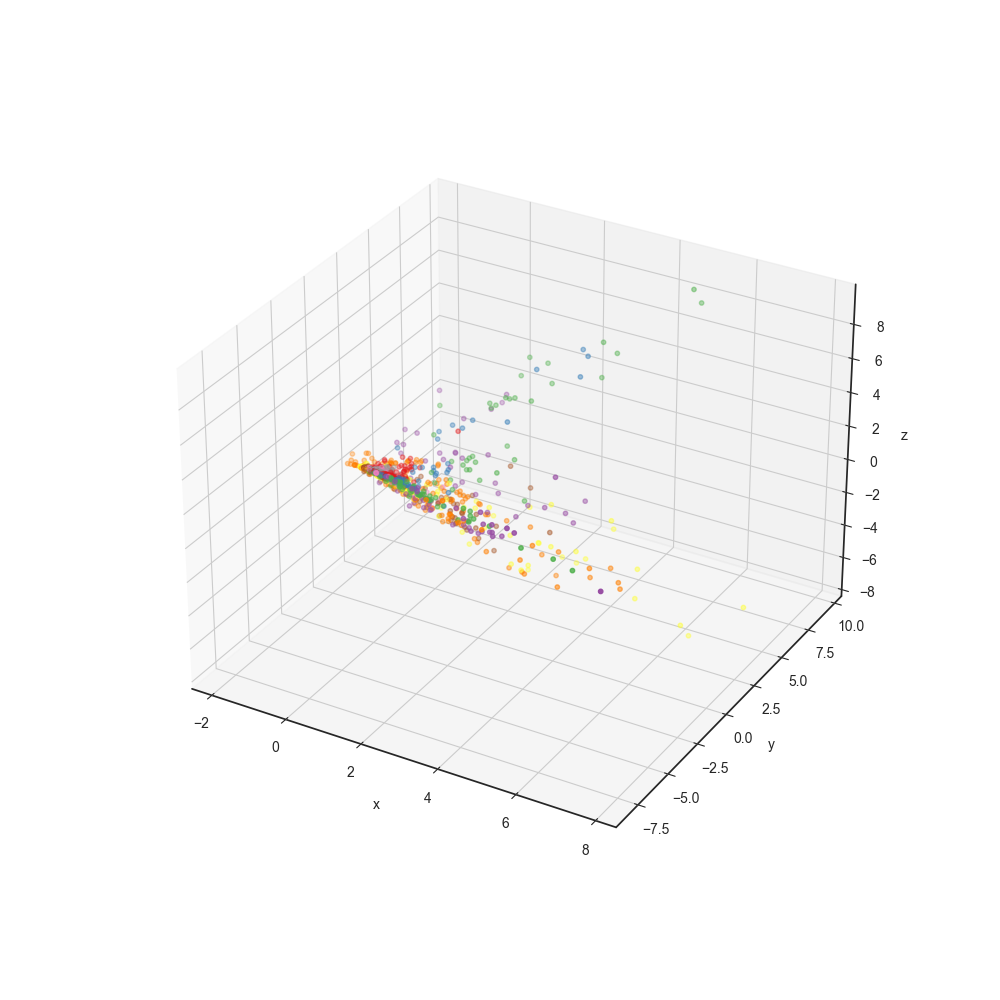

In [197]:
%%time

%matplotlib widget

pca = PCA(n_components=3)
pca.fit(X)

vis = pd.DataFrame(pca.transform(X))
vis['classe'] = som.get_bmus(som.get_surface_state())[:,1]

ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

ax.scatter(vis[0], vis[1], vis[2], c=vis['classe'], cmap="Set1", s=10)
# ax.scatter(vis[0], vis[1], zs=0, zdir='z', s=10)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

- - -

In [198]:
%matplotlib inline

from minisom import MiniSom

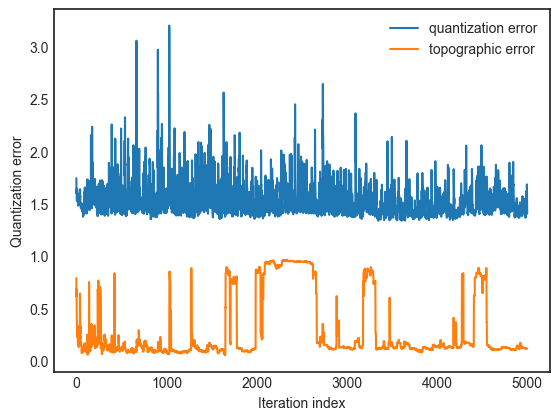

CPU times: user 3.5 s, sys: 1.02 ms, total: 3.5 s
Wall time: 3.5 s


In [200]:
%%time

som_shape = (1, 6)

som = MiniSom(som_shape[0], som_shape[1], X.shape[1], sigma=0.5, learning_rate=0.5)

max_iter = 5000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(X))
    som.update(X[rand_i], som.winner(X[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(X))
    t_error.append(som.topographic_error(X))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('Quantization error')
plt.xlabel('Iteration index')
plt.legend()
plt.show()

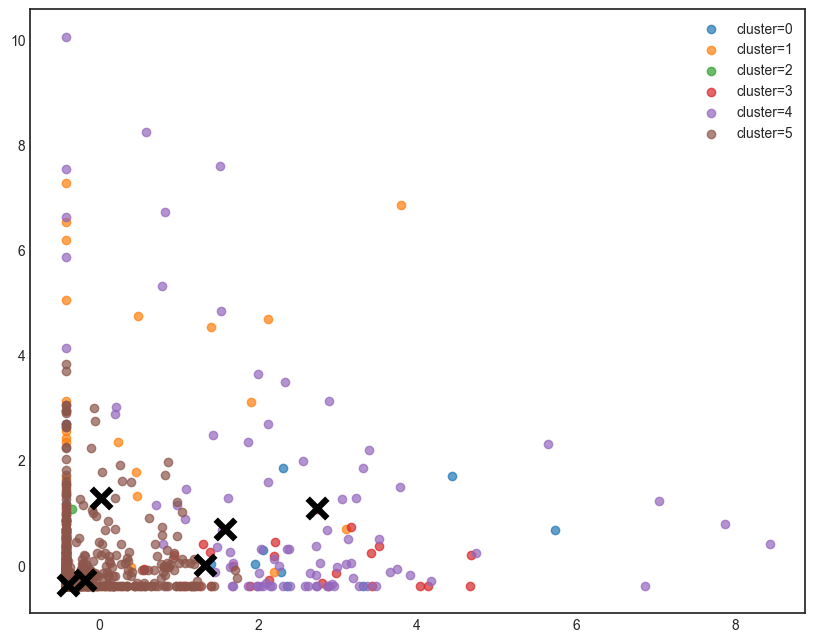

In [201]:
winner_coordinates = np.array([som.winner(x) for x in X]).T

cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

plt.figure(figsize=(10,8))

for c in np.unique(cluster_index):
    plt.scatter(X[cluster_index == c, 0],
                X[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=10, linewidths=20, color='k') # label='centroid'
    
plt.legend()

In [202]:
%%time

analise['classe'] = cluster_index
analise['cell']   = 1

ptab = pd.pivot_table(analise, 
                        values  = 'cell', 
                        index   = 'pos_first', 
                        columns = 'classe', 
                        aggfunc = 'count',
                        fill_value = 0.0)
# ptab_perc = ptab.copy()
# ptab_perc.div( ptab.sum(axis=1), axis=0 ).style.apply(highlight_max, axis=1)
ptab.style.apply(highlight_max, axis=0)

CPU times: user 11.9 ms, sys: 0 ns, total: 11.9 ms
Wall time: 10.8 ms


classe,0,1,2,3,4,5
pos_first,,,,,,
ATA,0,19,0,4,20,242
GOL,0,0,35,1,0,60
LAT,4,2,0,16,19,159
MEI,2,9,0,19,33,345
TEC,0,0,0,0,0,91
ZAG,10,0,1,12,15,165


CPU times: user 101 ms, sys: 205 ms, total: 306 ms
Wall time: 26 ms


Text(0.5, 0, 'z')

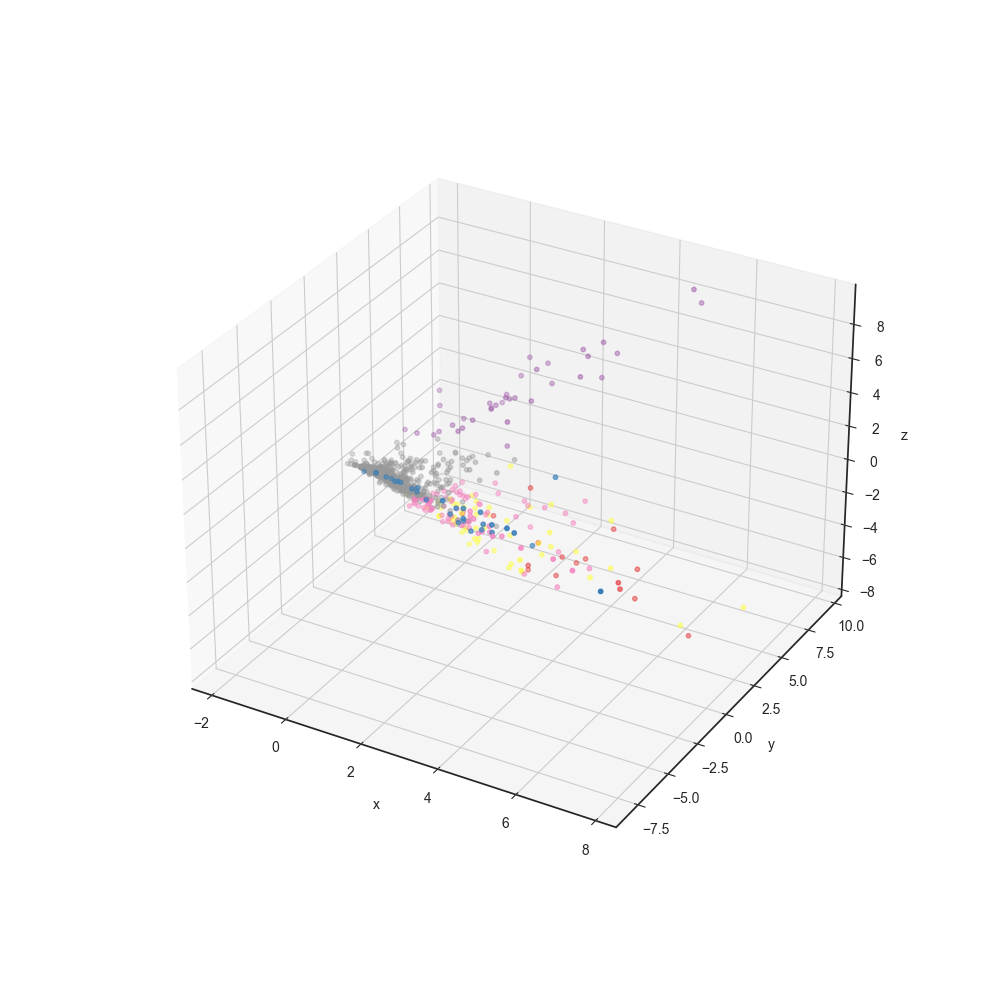

In [203]:
%%time

%matplotlib widget

pca = PCA(n_components=3)
pca.fit(X)

vis = pd.DataFrame(pca.transform(X))
vis['classe'] = cluster_index

ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

ax.scatter(vis[0], vis[1], vis[2], c=vis['classe'], cmap="Set1", s=10)
# ax.scatter(vis[0], vis[1], zs=0, zdir='z', s=10)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

.